In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
bs_data = load_boston()

In [23]:
X = pd.DataFrame(bs_data.data, columns = bs_data.feature_names)
y = pd.DataFrame(bs_data.target)

In [24]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [25]:
X.shape

(506, 13)

In [6]:
y.shape

(506, 1)

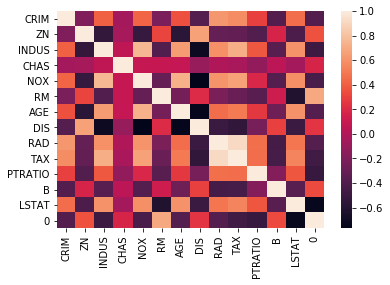

In [26]:
sns.heatmap(pd.concat([X,y],axis = 1).corr())

In [7]:
X = X[['RM','LSTAT','PTRATIO','TAX','INDUS']]
X.shape

(506, 5)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 1)

### Linear regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
preds = model_lr.predict(X_val)

In [11]:
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
r2_score(y_val, preds) * 100

76.3417443213847

In [29]:
mean_squared_error(y_val,preds)

23.380836480270247

### Decision Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
model_dt = DecisionTreeRegressor(max_depth = 10, min_samples_split = 4, random_state = 1)
model_dt.fit(X_train,y_train)
preds_dt = model_dt.predict(X_val)

In [16]:
r2_score(y_val, preds_dt)

0.8415170396735501

In [17]:
mean_squared_error(y_val, preds_dt)

15.662457243841748

<img src = "files/dt2.jpeg">

### Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
yt = np.array(y_train).ravel()

In [111]:
yt.shape

(404,)

In [53]:
model_rf = RandomForestRegressor(n_estimators =300 , max_depth = 10, min_samples_split = 2, verbose = 0, random_state = 1)
model_rf.fit(X_train,y_train)
preds_rf = model_rf.predict(X_val)

<ipython-input-53-b5a6505a0c56>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train,y_train)


In [54]:
r2_score(y_val,preds_rf)

0.9125133142299156

In [50]:
mean_squared_error(y_val,preds_rf)

10.290121203178415

### Visualisation

In [51]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(5, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt




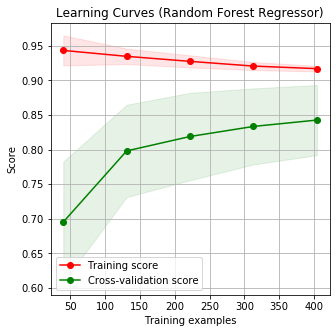

In [52]:
#fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Random Forest Regressor)"

cv = ShuffleSplit(n_splits = 50, test_size=0.2, random_state = 1)
yt = np.array(y).ravel()
estimator = RandomForestRegressor(n_estimators = 300, max_depth = 4, min_samples_split = 2, verbose = 0, random_state = 1)
plt = plot_learning_curve(estimator, title, X, yt,
                    cv=cv)
plt.show()

### Modularity

In [55]:
def train_and_evaluate(model, X_train, y_train, X_val, y_val, metric):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    evaluator = eval(metric)
    score = evaluator(y_val, preds)
    print(f'{metric} on evaluating the model {model.__class__.__name__} is {score}')

In [57]:
rf = RandomForestRegressor(n_estimators = 300, max_depth = 10, min_samples_split = 2, verbose = 0, random_state = 1)
train_and_evaluate(rf, X_train, y_train, X_val, y_val, 'r2_score')

<ipython-input-55-dc364fbcf826>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


r2_score on evaluating the model RandomForestRegressor is 0.9125133142299156


<img src = "files/gdscv.png">

### Grid Search CV

In [55]:
from sklearn.svm import SVR

In [61]:
from sklearn.model_selection import GridSearchCV, cross_validate
import math

In [62]:
def svr_model(X, y):
    gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

    scoring = {
               'abs_error': 'neg_mean_absolute_error',
               'squared_error': 'neg_mean_squared_error'}

    scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)
    return "MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean()))

In [63]:
print(svr_model(X,yt))

('MAE :', 5.2210424716606685, '| RMSE :', 7.110994193782708)
